# This code aims to select the siginificant variables from 40 macrovariables and three lags of y. The variables selected from Elastic net and post OLS selecion is PE ratio, Central bank interest rate and the first lag of y and the third lag of y. Then OLS, ANN and SVM are applied to make a in-sample analysis using the selected variables. It turns out that SVM performs best in terms of R squared

# Import Data

In [1]:
print(__doc__)

# Author: Olivier Grisel, Gael Varoquaux, Alexandre Gramfort
# License: BSD 3 clause

import time
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt


from sklearn.linear_model import LassoCV, LassoLarsCV, LassoLarsIC
from sklearn import datasets
from pandas import DataFrame as df
from sklearn import preprocessing 


data= pd.read_excel('data_used-3.xlsx', header=None) #index_col=1,index_row=1,sheetname='sheet1'
#data= pd.read_excel('data_no_four_interest.xlsx', header=None) #index_col=1,index_row=1,sheetname='sheet1'
#data= pd.read_excel('data4.0.xlsx', header=None) #index_col=1,index_row=1,sheetname='sheet1'




Automatically created module for IPython interactive environment


# Data Preprocessing

In [2]:
data = np.array(data)
X=data[0:132,0:40]
X_sample = X[2:131,0:39]
y1 = X[2:131,-1].reshape(129,1)
y2 = X[1:130,-1].reshape(129,1)
y3 = X[0:129,-1].reshape(129,1)
X_sample = np.hstack((X_sample, y1,y2,y3))
Standardscaler = preprocessing.StandardScaler().fit(X_sample)
X_sample1= Standardscaler.transform(X_sample)
y = X[3:132,-1]

In [3]:
X_sample1.shape

(129, 42)

# Feature selection by Lasso

Computing regularization path using the coordinate descent lasso...


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


(0, 5)

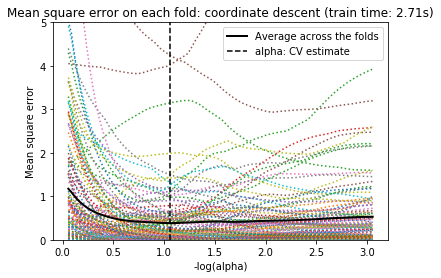

In [4]:
# Compute paths
print("Computing regularization path using the coordinate descent lasso...")
t1 = time.time()
model = LassoCV(cv=129).fit(X_sample1, y)
t_lasso_cv = time.time() - t1

# Display results
m_log_alphas = -np.log10(model.alphas_)

plt.figure()
ymin, ymax = 0, 5
plt.plot(m_log_alphas, model.mse_path_, ':')
plt.plot(m_log_alphas, model.mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha: CV estimate')

plt.legend()

plt.xlabel('-log(alpha)')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: coordinate descent '
          '(train time: %.2fs)' % t_lasso_cv)
plt.axis('tight')
plt.ylim(ymin, ymax)



In [5]:
model.alpha_

0.08784945936599524

In [6]:
from sklearn import linear_model
#reg = linear_model.LassoLars(alpha=0.146)
reg = linear_model.Lasso(alpha=0.0878)
reg.fit(X_sample1,y)
print(reg.coef_) 
reg.intercept_
reg.score(X_sample1,y)



[-0.          0.         -0.          0.          0.06290966  0.
 -0.         -0.          0.          0.         -0.         -0.
  0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.          0.04275714  0.
 -0.          0.          0.          0.60832877  0.02440177  0.16964758]


0.6995297737209278

# Feature selection by Elastic-Net

In [7]:
# Elastic-net
from sklearn.linear_model import ElasticNetCV
from sklearn.datasets import make_regression
regr = ElasticNetCV(l1_ratio=[.1,.2,.3,.4,.5,.6,.65,.7,.75,.8,.85,.9,.95,0.99,1], cv=129,max_iter = 3000)
regr.fit(X_sample1, y)
#fit_intercept=False



print(regr.alpha_) 
print(regr.l1_ratio_) 
print(regr.intercept_)
print(regr.n_iter_)
print(regr.coef_)
#print(regr.alphas_)
#print(regr.mse_path_)

0.10335230513646496
0.85
-7.345890420611926
23
[-0.          0.         -0.          0.          0.0645335   0.
 -0.         -0.          0.          0.         -0.         -0.
  0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.          0.          0.          0.
  0.         -0.         -0.          0.          0.0449742   0.
 -0.          0.          0.          0.58287294  0.04465819  0.16759281]


In [8]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

regr = ElasticNet(alpha =0.07640697966408586, l1_ratio=1.0,max_iter = 3000)

regr.fit(X_sample1, y)
#regr.fit(X_sample1, y)


#fit_intercept=False
print(regr.coef_) 

print(regr.intercept_) 

[-0.          0.         -0.0018971   0.          0.06958275  0.
 -0.         -0.          0.          0.         -0.         -0.
  0.         -0.          0.          0.         -0.         -0.
 -0.         -0.         -0.         -0.         -0.         -0.
  0.          0.          0.         -0.          0.          0.
  0.         -0.         -0.          0.          0.05051929  0.
 -0.          0.          0.          0.61026093  0.02713637  0.17292504]
-7.345890420611926


In [9]:
regr.score(X_sample1,y)

0.7029605959227343

In [19]:
SF = X_sample1[:,1].reshape(129,1)
VF = X_sample1[:,2].reshape(129,1)
PE = X_sample1[:,4].reshape(129,1)
LTBY = X_sample1[:,8].reshape(129,1)
CU = X_sample1[:,14].reshape(129,1)
CPUI = X_sample1[:,18].reshape(129,1)
PPIM = X_sample1[:,19].reshape(129,1)
PPIVY = X_sample1[:,22].reshape(129,1)
CBLR = X_sample1[:,34].reshape(129,1)
y1 = X_sample1[:,39].reshape(129,1)
y2 = X_sample1[:,40].reshape(129,1)
y3 = X_sample1[:,41].reshape(129,1)

In [20]:
#X_selected_3lags = np.hstack((SF,VF,PE,LTBY,CU,CPUI,PPIM,PPIVY,y1,y2,y3))
X_selected_3lags = np.hstack((PE,CBLR,y1,y2,y3))


In [21]:
# #write the data into excel
# from xlsxwriter import Workbook
# wb = Workbook('X_selected_3lags.xlsx')
# sheet1 = wb.add_worksheet('sheet1')
# row = 0
# col = 0
# for i in range(129):
#     sheet1.write(row,col,SF[i,0])
#     sheet1.write(row,col,VF[i,0])
#     sheet1.write(row,col+1,PE[i,0])
#     sheet1.write(row,col+2,SB[i,0])
#     sheet1.write(row,col+3,IPIY[i,0])
#     sheet1.write(row,col+4,PPIM[i,0])
#     sheet1.write(row,col+5,PPIY[i,0])
#     sheet1.write(row,col+6,M2Y[i,0])
#     row += 1
# wb.close()

# Post-selection by OLS

In [22]:
import statsmodels.api as sm
X_selected_3lags = sm.add_constant(X_selected_3lags)

In [23]:
model = sm.OLS(y,X_selected_3lags)

In [24]:
modelfit = model.fit()

In [25]:
print(modelfit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.713
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     60.97
Date:                Thu, 03 Jan 2019   Prob (F-statistic):           1.15e-31
Time:                        23:00:53   Log-Likelihood:                -111.98
No. Observations:                 129   AIC:                             236.0
Df Residuals:                     123   BIC:                             253.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3459      0.052   -141.333      0.0

# In-sample Estimation: OLS using variables selected by post-selection:   PE,CBLR,y1,y2

In [26]:
X_postselected = np.hstack((PE,CBLR,y1,y3))
X_postselected = X_postselected[0:131,:]

In [27]:
X_postselected_constant = sm.add_constant(X_postselected)
model= sm.OLS(y, X_postselected_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.712
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     76.73
Date:                Thu, 03 Jan 2019   Prob (F-statistic):           1.30e-32
Time:                        23:00:57   Log-Likelihood:                -112.04
No. Observations:                 129   AIC:                             234.1
Df Residuals:                     124   BIC:                             248.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3459      0.052   -141.838      0.0

# In-sample Estimation: OLS benchmark y1,y2

In [28]:
X_benchmark = np.hstack((y1,y3))
X_benchmark = X_benchmark[0:129,:]

In [29]:
X_benchmark_constant = sm.add_constant(X_benchmark)
model= sm.OLS(y, X_benchmark_constant)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.688
Method:                 Least Squares   F-statistic:                     142.3
Date:                Thu, 03 Jan 2019   Prob (F-statistic):           4.70e-33
Time:                        23:01:04   Log-Likelihood:                -116.17
No. Observations:                 129   AIC:                             238.3
Df Residuals:                     126   BIC:                             246.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.3459      0.053   -138.471      0.0

# In-sample Estimation: SVM benchmark:   y1,y3; this one will be rerun

In [30]:
from sklearn.svm import SVR

In [31]:
from sklearn.model_selection import GridSearchCV
estimator = SVR()
grid = {
    "C" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
    "epsilon" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
    #"nu" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    "gamma" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
    }
model = GridSearchCV(estimator, grid, cv=129, n_jobs=8, scoring='neg_mean_absolute_error')
   
#y_test1 = y_test1.reshape(i+1,)
model.fit(X_benchmark, y)
model.best_estimator_.fit(X_benchmark,y)
model.best_estimator_.score(X_benchmark,y)
    

KeyboardInterrupt: 

# In-sample Estimation: SVM using variables selected by post-selection:   PE,CBLR,y1,y3

In [ ]:
from sklearn.model_selection import GridSearchCV
estimator = SVR()
grid = {
    "C" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
    "epsilon" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)],
    #"nu" :[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
    "gamma" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
    }
model = GridSearchCV(estimator, grid, cv=129, n_jobs=8, scoring='neg_mean_absolute_error')
   
#y_test1 = y_test1.reshape(i+1,)
model.fit(X_postselected, y)
model.best_estimator_.fit(X_postselected,y)
model.best_estimator_.score(X_postselected,y)

# In-sample Estimation: ANN using variables selected by post-selection: PE,CBLR,y1,y3

In [32]:
X_postselected = np.hstack((PE,CBLR,y1,y3))
X_postselected = X_postselected[0:131,:]
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
estimator = MLPRegressor(hidden_layer_sizes=(3,),solver='lbfgs',max_iter=3000)
grid = {
        "alpha" : [2**(-15), 2**(-13),2**(-11),2**(-9), 2**(-7), 2**(-5), 2**(-3),2**(-1),2**(1),2**(3),2**(5),2**(7),2**(9),2**(11),2**(13),2**(15)]
#       "alpha" : [10**(-7),10**(-6),10**(-5),10**(-4),10**(-3),10**(-2),10**(-1),10**(0),10**(1),10**(2),10**(3),10**(4),10**(5),10**(6),10**(7)],
    }
model = GridSearchCV(estimator, grid, cv=10, n_jobs=8, scoring='neg_mean_absolute_error')
model.fit(X_postselected, y)
model.best_estimator_.fit(X_postselected,y)
model.best_estimator_.score(X_postselected,y) 

0.7120096644611308